# Part 3 : Critical study of the Bechdel test

# Step 3.1 : Quantity of actresses

## Section 1: Import datas

In this task, we utilize the previously created 'merged_df.csv'. The objective is to examine the influence of the presence of actresses on movies that either pass or fail the Bechdel test. One of the conditions for the test is to have two female actresses engaging in a conversation. The questions we aim to answer are: Does having a greater number of actresses make it easier to pass the test? Conversely, do movies with fewer actresses tend to focus more on developing the interactions between the two characters, resulting in a higher likelihood of passing the test?

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
%matplotlib inline

In [2]:
data_folder = './'
#df is the name of the main dataset (CMU dataset merged with bechdel test)
df = pd.read_csv(data_folder + 'merged_df.csv', header=0)
df.head(3)

,Unnamed: 0.1,Unnamed: 0,imdbid,year_x,rating,id,title,WikiID,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages (Freebase ID:name tuples),Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples),year_y
0,0,2,2221420.0,1878,0,9603,Sallie Gardner at a Gallop,26044155.0,26044155,/m/0b6f62m,Sallie Gardner at a Gallop,NaN,NaN,0.05,"{""/m/06ppq"": ""Silent film""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",NaN
1,1,13,392728.0,1888,0,8040,Roundhay Garden Scene,1082508.0,1082508,/m/044ggd,Roundhay Garden Scene,NaN,NaN,0.03,"{""/m/06ppq"": ""Silent film""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",NaN
2,2,18,466876.0,1889,0,9619,"Leisurely Pedestrians, Open Topped Buses and H...",12170539.0,12170539,/m/02vs8rb,"Leisurely Pedestrians, Open Topped Buses and H...",NaN,NaN,NaN,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/07ssc"": ""United Kingdom""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",NaN


We will also used the dataframe 'character.metadata.tsv' given in the CMU dataset. This allows to get the actors (names anf gender) and join them after to the main dataframe df

In [3]:
#dataframe of characters and their features by movies from CMU Movie Summary Corpus
column_names = [
    'Wikipedia movie ID',
    'Freebase movie ID',
    'Movie release date',
    'Character name',
    'Actor date of birth',
    'Actor gender',
    'Actor height (in meters)',
    'Actor ethnicity (Freebase ID)',
    'Actor name',
    'Actor age at movie release',
    'Freebase character/actor map ID',
    'Freebase character ID',
    'Freebase actor ID'
]

df_characters = pd.read_csv(data_folder + 'MovieSummaries/character.metadata.tsv', delimiter='\t', quotechar='"', names=column_names, header=0)
df_characters.head(3)

,Wikipedia movie ID,Freebase movie ID,Movie release date,Character name,Actor date of birth,Actor gender,Actor height (in meters),Actor ethnicity (Freebase ID),Actor name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
1,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
2,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc


## Section 2: Merge dataframes

In [4]:
#merge to the main dataframe to have actors and actress (names anf gender) for each movie
df_characters_merged = pd.merge(df, df_characters[['Wikipedia movie ID', 'Actor name', 'Actor gender']], 
                                on=['Wikipedia movie ID'], 
                                how='right')

#Drop characters associtated to movies we don't know 
df_characters_merged.dropna(subset=['title'], inplace=True)
df_characters_merged = df_characters_merged.drop_duplicates(subset=['Wikipedia movie ID', 'Actor name'])

#instead of ranking for Bechdel test we will only see if the movie pass the test or not
df_characters_merged['Bechdel pass'] = np.where(df_characters_merged['rating'] == 3, 1, 0)

In [10]:
df_characters_merged.head(3)

,Unnamed: 0.1,Unnamed: 0,imdbid,year_x,rating,id,title,WikiID,Wikipedia movie ID,Freebase movie ID,...,Movie release date,Movie box office revenue,Movie runtime,Movie languages (Freebase ID:name tuples),Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples),year_y,Actor name,Actor gender,Bechdel pass
0,3281.0,3984.0,228333.0,2001.0,3.0,333.0,Ghosts of Mars,975900.0,975900,/m/03vyhn,...,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001.0,Natasha Henstridge,F,1
1,3281.0,3984.0,228333.0,2001.0,3.0,333.0,Ghosts of Mars,975900.0,975900,/m/03vyhn,...,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001.0,Ice Cube,M,1
2,3281.0,3984.0,228333.0,2001.0,3.0,333.0,Ghosts of Mars,975900.0,975900,/m/03vyhn,...,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001.0,Jason Statham,M,1


In [6]:
df_characters_merged.shape

(71013, 21)

Now, we perform basic tests to verify that the data is usable. The dataset is substantial; we can afford to remove certain rows.

### check for unknown gender

In [7]:
unique_genders = df_characters_merged['Actor gender'].unique()
print(unique_genders)

na_proportion = df_characters_merged['Actor gender'].isna().mean()
print("Proportion de valeurs manquantes dans la colonne 'gender':", na_proportion)

['F' 'M' nan]
Proportion de valeurs manquantes dans la colonne 'gender': 0.07759142692183121


We can see that the proportion of values is very low, so we can delete the rows in the dataframe where the gender is neither 'F' nor 'M'.

In [8]:
df_characters_merged.dropna(subset=['Actor gender'], inplace=True)
unique_genders = df_characters_merged['Actor gender'].unique()
print(unique_genders)

['F' 'M']


### Now, we want to add for each movie, the number and proportion of actress and actors

In [11]:
#Group by 'Wikipedia movie ID' and count the occurrences of each gender
gender_counts = df_characters_merged.groupby('Wikipedia movie ID')['Actor gender'].value_counts().unstack()

# Calculate the proportion of female and male actors for each movie
gender_proportion = gender_counts.div(gender_counts.sum(axis=1), axis=0)

# Add the proportion columns to the original dataframe
df_characters_merged = df_characters_merged.merge(gender_proportion, left_on='Wikipedia movie ID', right_index=True, how='left')
df_characters_merged.rename(columns={'F': 'female_actor_proportion', 'M': 'male_actor_proportion'}, inplace=True)

#Calculate the number of female and male actors for each movie
gender_counts2 = df_characters_merged.groupby(['Wikipedia movie ID', 'Bechdel pass'])['Actor gender'].value_counts().unstack(fill_value=0)
gender_counts2.columns = ['female_actresses','male_actors']
gender_counts2.reset_index(inplace=True)

# Merge the calculated counts back to the original DataFrame
df_characters_merged = pd.merge(df_characters_merged, gender_counts2[['Wikipedia movie ID', 'Bechdel pass', 'male_actors', 'female_actresses']], on=['Wikipedia movie ID', 'Bechdel pass'], how='left')

In [12]:
df_characters_merged.head(3)

,Unnamed: 0.1,Unnamed: 0,imdbid,year_x,rating,id,title,WikiID,Wikipedia movie ID,Freebase movie ID,...,Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples),year_y,Actor name,Actor gender,Bechdel pass,female_actor_proportion,male_actor_proportion,male_actors,female_actresses
0,3281.0,3984.0,228333.0,2001.0,3.0,333.0,Ghosts of Mars,975900.0,975900,/m/03vyhn,...,"{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001.0,Natasha Henstridge,F,1,0.3125,0.6875,11,5
1,3281.0,3984.0,228333.0,2001.0,3.0,333.0,Ghosts of Mars,975900.0,975900,/m/03vyhn,...,"{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001.0,Ice Cube,M,1,0.3125,0.6875,11,5
2,3281.0,3984.0,228333.0,2001.0,3.0,333.0,Ghosts of Mars,975900.0,975900,/m/03vyhn,...,"{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001.0,Jason Statham,M,1,0.3125,0.6875,11,5


In [13]:
#dataframe grouped by movies
df_characters_merged_bymovie = df_characters_merged.groupby('Wikipedia movie ID').first().reset_index()

In [14]:
df_characters_merged_bymovie.head(3)

,Wikipedia movie ID,Unnamed: 0.1,Unnamed: 0,imdbid,year_x,rating,id,title,WikiID,Freebase movie ID,...,Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples),year_y,Actor name,Actor gender,Bechdel pass,female_actor_proportion,male_actor_proportion,male_actors,female_actresses
0,330,2822.0,3427.0,115462.0,1997.0,3.0,1794.0,Actrius,330.0,/m/0ktn59,...,"{""/m/06mkj"": ""Spain""}","{""/m/07s9rl0"": ""Drama"", ""/m/01t_vv"": ""Comedy-d...",NaN,Rosa Maria Sardà,F,1,1.000000,NaN,0,4
1,3217,2310.0,2829.0,106308.0,1992.0,2.0,1276.0,Army of Darkness,3217.0,/m/014hr,...,"{""/m/09c7w0"": ""United States of America""}","{""/m/01q03"": ""Cult"", ""/m/03npn"": ""Horror"", ""/m...",1992.0,Ted Raimi,M,0,0.300000,0.700000,7,3
2,3333,55.0,138.0,4972.0,1915.0,2.0,1258.0,"Birth of a Nation, The",3333.0,/m/0151l,...,"{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/0219x_"": ""Indi...",NaN,Lillian Gish,F,0,0.428571,0.571429,8,6


In [15]:
#ratio of movies with less than two actress and pass the test 
df_characters_merged_bymovie_missing = df_characters_merged_bymovie[(df_characters_merged_bymovie['Bechdel pass'] == 1) & (df_characters_merged_bymovie['female_actresses'] < 2)]
ratio = len(df_characters_merged_bymovie_missing) / len(df_characters_merged_bymovie)
print("Ratio of lengths:", ratio)

Ratio of lengths: 0.0448638063022966


The ratio is indeed very low, but it is technically not possible to pass the test with fewer than two female actresses since they need to engage in a conversation. This is likely due to the incomplete nature of the dataset with the characters.

## proportion of actress and Bechdel test 

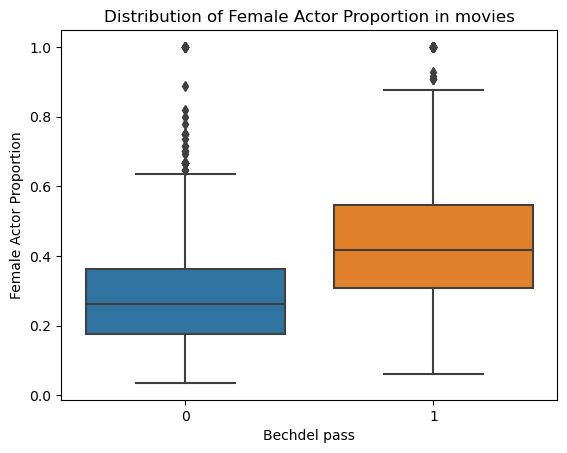

In [16]:
# Calculate the mean of 'female_actor_proportion' for each group
grouped_data = df_characters_merged.groupby(['Wikipedia movie ID', 'Bechdel pass'])['female_actor_proportion'].mean().reset_index()
# Create a box plot 
sns.boxplot(x='Bechdel pass', y='female_actor_proportion', data=grouped_data)

plt.xlabel('Bechdel pass')
plt.ylabel('Female Actor Proportion')
plt.title('Distribution of Female Actor Proportion in movies')
plt.show()

In [17]:
grouped_data.head(3)

,Wikipedia movie ID,Bechdel pass,female_actor_proportion
0,330,1,1.000000
1,3217,0,0.300000
2,3333,0,0.428571


In the next step for Milestone 3, we will conduct further investigations and tests to determine if this parameter is significant.

Now, we can see the proportion of movies passing the Bechdel test among female_actresses == 2 and female_actresses > 2

In [18]:
# Filter the DataFrame where 'female_actresses' is equal to 2
filtered_data = df_characters_merged_bymovie[df_characters_merged_bymovie['female_actresses'] == 2]
filtered_data2 = df_characters_merged_bymovie[df_characters_merged_bymovie['female_actresses'] > 2]

# Calculate the mean of 'female_actor_proportion' for each group
filtered_data_pass_bechdel = filtered_data[filtered_data['Bechdel pass'] == 1]
proportion_pass_bechdel = len(filtered_data_pass_bechdel) / len(filtered_data)

filtered_data_pass_bechdel2 = filtered_data2[filtered_data2['Bechdel pass'] == 1]
proportion_pass_bechdel2 = len(filtered_data_pass_bechdel2) / len(filtered_data2)

print("Proportion of movies passing the Bechdel test among female_actresses == 2:", proportion_pass_bechdel)
print("Proportion of movies passing the Bechdel test among female_actresses > 2:", proportion_pass_bechdel2)

Proportion of movies passing the Bechdel test among female_actresses == 2: 0.4221267454350161
Proportion of movies passing the Bechdel test among female_actresses > 2: 0.6491847826086956


In [19]:
# Filter the DataFrame where 'female_actresses' is equal to 2 and Bechdel test is passed
filtered_data_pass_bechdel_2_female = df_characters_merged_bymovie[(df_characters_merged_bymovie['female_actresses'] == 2) & (df_characters_merged_bymovie['Bechdel pass'] == 1)]
filtered_data_fail_bechdel_2_female = df_characters_merged_bymovie[(df_characters_merged_bymovie['female_actresses'] == 2) & (df_characters_merged_bymovie['Bechdel pass'] == 0)]

# Calculate the proportion
proportion_pass_bechdel_2_female = len(filtered_data_pass_bechdel_2_female) / len(df_characters_merged_bymovie[df_characters_merged_bymovie['Bechdel pass'] == 1])
proportion_fail_bechdel_2_female = len(filtered_data_fail_bechdel_2_female) / len(df_characters_merged_bymovie[df_characters_merged_bymovie['Bechdel pass'] == 0])
print("Proportion of movies with exactly 2 female characters among Bechdel test passed:", proportion_pass_bechdel_2_female)
print("Proportion of movies with exactly 2 female characters among Bechdel test failed:", proportion_fail_bechdel_2_female)

Proportion of movies with exactly 2 female characters among Bechdel test passed: 0.12953197099538563
Proportion of movies with exactly 2 female characters among Bechdel test failed: 0.20828493999225706


In [22]:
# Filter the DataFrame where 'female_actresses' is equal to 2 and Bechdel test is passed or not
filtered_data_2_female = df_characters_merged_bymovie[(df_characters_merged_bymovie['female_actresses'] == 2)]
filtered_data_2_female_pass = df_characters_merged_bymovie[(df_characters_merged_bymovie['female_actresses'] == 2) & (df_characters_merged_bymovie['Bechdel pass'] == 1)]
filtered_data_2_female_fail = df_characters_merged_bymovie[(df_characters_merged_bymovie['female_actresses'] == 2) & (df_characters_merged_bymovie['Bechdel pass'] == 0)]

# Calculate the proportion
proportion_pass_bechdel_2_female = len(filtered_data_2_female_pass) / len(filtered_data_2_female)
proportion_fail_bechdel_2_female = len(filtered_data_2_female_fail) / len(filtered_data_2_female)
print("Proportion of movies that pass the Bechdel test for 2 female actresses : ", proportion_pass_bechdel_2_female)
print("Proportion of movies that fail the Bechdel test for 2 female actresses : ", proportion_fail_bechdel_2_female)

Proportion of movies that pass the Bechdel test for 2 female actresses :  0.4221267454350161
Proportion of movies that fail the Bechdel test for 2 female actresses :  0.5778732545649838


We are also looking at the proportion of movies among those that pass the test that have only 2 female characters.

In [23]:
# Filter the DataFrame where 'female_actresses' is equal to 2 and Bechdel test is passed
filtered_data_pass = df_characters_merged_bymovie[(df_characters_merged_bymovie['Bechdel pass'] == 1)]
# Calculate the proportion
proportion_pass_bechdel_2_female = len(filtered_data_pass[filtered_data_pass['female_actresses'] == 2]) / len(filtered_data_pass)
proportion_pass_bechdel_female = len(filtered_data_pass[filtered_data_pass['female_actresses'] > 2]) / len(filtered_data_pass)
print("Proportion of movies with exactly 2 female characters among Bechdel test passed:", proportion_pass_bechdel_2_female)
print("Proportion of movies with more than 2 female characters among Bechdel test passed:", proportion_pass_bechdel_female )

Proportion of movies with exactly 2 female characters among Bechdel test passed: 0.12953197099538563
Proportion of movies with more than 2 female characters among Bechdel test passed: 0.7874093605800923


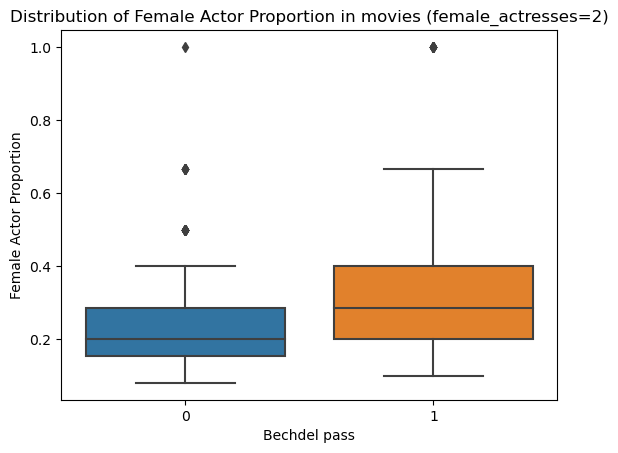

In [25]:
#PROPORTION OF ACTRESS AND BECHDEL TEST FOR ONLY 2 
# Filter the DataFrame where 'female_actresses' is equal to 2
filtered_data = df_characters_merged_bymovie[df_characters_merged_bymovie['female_actresses'] == 2]

# Create a box plot or violin plot
sns.boxplot(x='Bechdel pass', y='female_actor_proportion', data=filtered_data)

plt.xlabel('Bechdel pass')
plt.ylabel('Female Actor Proportion')
plt.title('Distribution of Female Actor Proportion in movies (female_actresses=2)')
plt.show()


We can also look at whether movies pass the test more easily based on the number of actresses

In [26]:
# Group by 'female_actresses' and calculate the proportion of movies passing the Bechdel test for each group
proportion_by_female_actors_pass = df_characters_merged_bymovie.groupby('female_actresses')['Bechdel pass'].mean()

# Print the result
print(proportion_by_female_actors_pass)

female_actresses
0     0.159184
1     0.279895
2     0.422127
3     0.502183
4     0.609536
5     0.643678
6     0.667401
7     0.763514
8     0.839286
9     0.805970
10    0.897196
11    0.880000
12    0.837838
13    0.863636
14    0.857143
15    0.933333
16    0.875000
17    1.000000
18    1.000000
19    1.000000
20    1.000000
21    1.000000
22    1.000000
23    1.000000
25    0.000000
26    1.000000
28    0.000000
29    1.000000
Name: Bechdel pass, dtype: float64


For example, we can observe that one or more movies with 28 female actresses do not pass the test. In Milestone 3, we can analyze these movies more in-depth and question why they do not pass.

In [27]:
movies_with_28_female_actresses_fail_bechdel = df_characters_merged_bymovie[(df_characters_merged_bymovie['female_actresses'] == 28) & (df_characters_merged_bymovie['Bechdel pass'] == 0)]

# Print the result or further analyze the selected data
movies_with_28_female_actresses_fail_bechdel['title']

4019    Tropic Thunder
Name: title, dtype: object


Here are some really simple analyses that we can perform. In the last section, we can explore whether there are significant relationships (using regression, for example) between the number of actresses and the likelihood of passing the Bechdel test.

# Step 3.2 : Directors gender

In this part, we used the dataset 'all_directors_gender.csv' find online that give us the director name and gender for movies

In [28]:

# load the dataframe df_directors that contains for a movie the name of the director and his/her gender
df_directors = pd.read_csv(data_folder + 'all_directors_gender.csv', header=0)
df_directors.shape

(5056, 10)

In [29]:
df_directors.head(3)

,year,name,country,budget,gross,runtime,director,language,released,gender
0,2000,Mission: Impossible 2,['United States'],125000000,546400000,123,John Woo,['English'],2000/05/24,male
1,2000,Gladiator,"['United Kingdom', 'United States']",103000000,460500000,155,Ridley Scott,['English'],2000/05/01,male
2,2000,Cast Away,['United States'],90000000,429600000,143,Robert Zemeckis,['English'],2000/12/22,male


In [30]:
# Check for weird values in years values
years_range = df_directors['year'].unique()
print("years : ", years_range)
print("years range :", min(years_range), "-", max(years_range))
# Filter out rows where 'year' is equal to 202013
df_directors = df_directors[df_directors['year'] != 202013]
df_directors.shape
years_range = df_directors['year'].unique()
print("years :", years_range)
print("years range:", min(years_range), "-", max(years_range))

# Check for weird values in gender category
gender = df_directors['gender'].unique()
print("values for gender : ", gender)

years :  [  2000   2001   2002   2003   2004   2005   2006   2007   2008   2009
   2010   2011   2012   2013 202013   2014   2015   2016   2017   2018]
years range : 2000 - 202013
years : [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018]
years range: 2000 - 2018
values for gender :  ['male' 'female' 'unknown']


In [31]:
#we load the main dataframe
df = pd.read_csv(data_folder + 'merged_df.csv', header=0)
df.head(3)

,Unnamed: 0.1,Unnamed: 0,imdbid,year_x,rating,id,title,WikiID,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages (Freebase ID:name tuples),Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples),year_y
0,0,2,2221420.0,1878,0,9603,Sallie Gardner at a Gallop,26044155.0,26044155,/m/0b6f62m,Sallie Gardner at a Gallop,NaN,NaN,0.05,"{""/m/06ppq"": ""Silent film""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",NaN
1,1,13,392728.0,1888,0,8040,Roundhay Garden Scene,1082508.0,1082508,/m/044ggd,Roundhay Garden Scene,NaN,NaN,0.03,"{""/m/06ppq"": ""Silent film""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",NaN
2,2,18,466876.0,1889,0,9619,"Leisurely Pedestrians, Open Topped Buses and H...",12170539.0,12170539,/m/02vs8rb,"Leisurely Pedestrians, Open Topped Buses and H...",NaN,NaN,NaN,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/07ssc"": ""United Kingdom""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",NaN


In [32]:
# Merge based on matching values in 'year' and 'title'
df_merged = pd.merge(df, df_directors[['year', 'name', 'director', 'gender']], 
                     left_on=['year_x', 'title'], 
                     right_on=['year', 'name'], 
                     how='inner')

# Drop the redundant columns
df_merged = df_merged.drop(['year_y', 'name'], axis=1)

In [33]:
df_merged.head(3)

,Unnamed: 0.1,Unnamed: 0,imdbid,year_x,rating,id,title,WikiID,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages (Freebase ID:name tuples),Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples),year,director,gender
0,1156,4369,324133.0,2003,3,983,Swimming Pool,950429.0,950429,/m/03sq24,Swimming Pool,2003-05-18,22441323.0,103.0,"{""/m/064_8sq"": ""French Language"", ""/m/02h40lc""...","{""/m/0f8l9c"": ""France"", ""/m/07ssc"": ""United Ki...","{""/m/01jfsb"": ""Thriller"", ""/m/0lsxr"": ""Crime F...",2003,Fran\xc3\xa7ois Ozon,unknown
1,3128,3801,199753.0,2000,0,15,Red Planet,1494502.0,1494502,/m/055stg,Red Planet,2000-11-10,33463969.0,108.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01jfsb"": ""Thriller"", ""/m/01drsx"": ""Disast...",2000,Antony Hoffman,male
2,3130,3803,144084.0,2000,3,64,American Psycho,4846576.0,4846576,/m/0cqr0q,American Psycho,2000-01-21,34266564.0,102.0,"{""/m/06nm1"": ""Spanish Language"", ""/m/02h40lc"":...","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/02wtdps"": ""Crime...",2000,Mary Harron,female


In [34]:
# Filter rows with 'gender' equal to 'male' or 'female'
df_filtered = df_merged[df_merged['gender'].isin(['male', 'female'])]
df_filtered.head(3)

,Unnamed: 0.1,Unnamed: 0,imdbid,year_x,rating,id,title,WikiID,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages (Freebase ID:name tuples),Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples),year,director,gender
1,3128,3801,199753.0,2000,0,15,Red Planet,1494502.0,1494502,/m/055stg,Red Planet,2000-11-10,33463969.0,108.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01jfsb"": ""Thriller"", ""/m/01drsx"": ""Disast...",2000,Antony Hoffman,male
2,3130,3803,144084.0,2000,3,64,American Psycho,4846576.0,4846576,/m/0cqr0q,American Psycho,2000-01-21,34266564.0,102.0,"{""/m/06nm1"": ""Spanish Language"", ""/m/02h40lc"":...","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/02wtdps"": ""Crime...",2000,Mary Harron,female
3,3131,3804,164052.0,2000,3,78,Hollow Man,1332901.0,1332901,/m/04th45,Hollow Man,2000-08-02,190213455.0,119.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2000,Paul Verhoeven,male


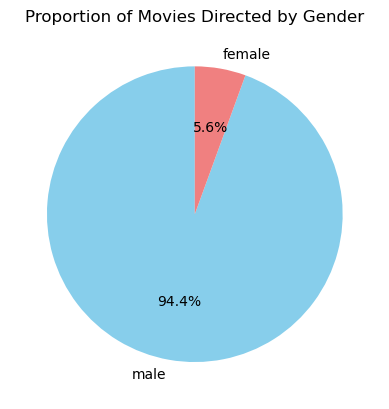

In [35]:
# Count the number of movies directed by each gender
gender_counts = df_filtered['gender'].value_counts()

# Plot a pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Proportion of Movies Directed by Gender')

# Show the plot
plt.show()

In [38]:
gender_counts

gender
male      1069
female      63
Name: count, dtype: int64

Here we see that proportion of female director in our merged dataframe is really low (only 64 female directors). It is important to check if these values are significant. On Wikipedia  we find that 'The percentage of female writers (11.8%) and producers (22%) can be seen as high compared to female directors (7.5%)." 
For the next milestone, we will perform more statistical tests to know if our dataset is significant, if not we can try to find more datas, to have a more representative dataset. 

In [40]:
# Calculate the proportions for each rating category for male directors
male_proportions = df_filtered[df_filtered['gender'] == 'male']['rating'].value_counts(normalize=True) * 100
female_proportions = df_filtered[df_filtered['gender'] == 'female']['rating'].value_counts(normalize=True) * 100

# Calculate the proportions for each rating category
directors_gender_prop = pd.merge(male_proportions, female_proportions, on=['rating'], how='outer')
directors_gender_prop.head(3)

,proportion_x,proportion_y
rating,,
3,52.946679,77.777778
1,28.624883,19.047619
2,10.102900,1.587302


/Users/mathisayma/anaconda3/envs/ADA/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

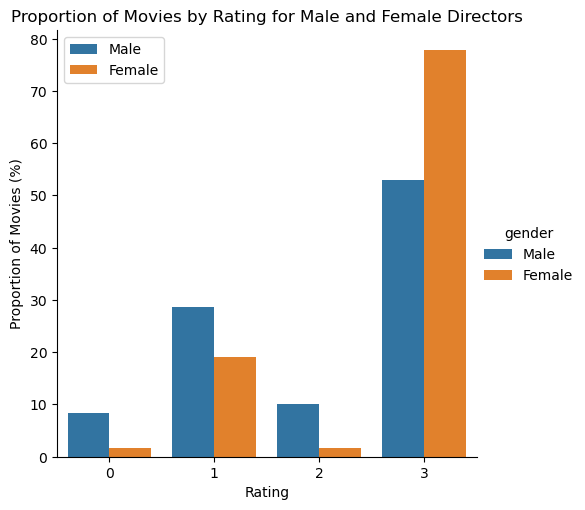

In [44]:
# Calculate the proportions for each rating category 
male_proportions = df_filtered[df_filtered['gender'] == 'male']['rating'].value_counts(normalize=True) * 100
female_proportions = df_filtered[df_filtered['gender'] == 'female']['rating'].value_counts(normalize=True) * 100

directors_gender_prop = pd.merge(male_proportions, female_proportions, on=['rating'], how='outer')
directors_gender_prop = directors_gender_prop.reset_index()

#Reset index and rename columns
directors_gender_prop = directors_gender_prop.rename(columns={ 'proportion_x': 'Male', 'proportion_y': 'Female'})
#directors_gender_prop = directors_gender_prop.reset_index(drop=True)
directors_gender_prop

directors_gender_prop = pd.melt(directors_gender_prop, id_vars='rating', var_name='gender', value_name='proportion')


# Set up the plot
plt.figure(figsize=(12, 6))

# Plot for both male and female directors
sns.catplot(x='rating', y='proportion', hue='gender', data=directors_gender_prop, kind='bar', height=5, aspect=1)

plt.xlabel('Rating')
plt.ylabel('Proportion of Movies (%)')
plt.title('Proportion of Movies by Rating for Male and Female Directors')

plt.legend()
plt.show()

The gender of the director seems to be an important factor to pass the Bechdel test. A correlation test will be done in the next Milestone 3

# Step 3.3 Age ratio of actresses and actors

In [45]:
headers_movie = ['Wikipedia movie ID', 'Freebase movie ID','Movie name','Movie release date', 'Movie box office revenue', 'Movie runtime', 'Movie languages', 'Movie countries', 'Movie genres']
headers_character = ["Wikipedia movie ID", "Freebase movie ID", "Movie release date", "Character name", "Actor date of birth", "Actor gender", "Actor height (in meters)", "Actor ethnicity (Freebase ID)", "Actor name", "Actor age at movie release", "Freebase character/actor map ID", "Freebase character ID", "Freebase actor ID"]
#dfm = pd.read_csv('movie.metadata.tsv', sep='\t', header=None, names=headers_movie)
dfc = pd.read_csv('MovieSummaries/character.metadata.tsv', sep='\t', header=None, names=headers_character)
dfm = pd.read_csv(data_folder + 'merged_df.csv', header=0)

In [46]:
actors = dfc[dfc['Actor gender'] == 'M']
actresses = dfc[dfc['Actor gender'] == 'F']

# Calculate average age for actors and actresses in each movie
avg_age_actors = actors.groupby('Wikipedia movie ID')['Actor age at movie release'].mean()
avg_age_actresses = actresses.groupby('Wikipedia movie ID')['Actor age at movie release'].mean()

# Compute the ratio for each movie
ratio = avg_age_actresses / avg_age_actors
ratio = ratio.rename('ratio')
dfm = dfm.merge(ratio, how='left', left_on='Wikipedia movie ID', right_index=True)

In [47]:
# Create a list of film Wikiepedia IDs with no missing values for the age of actors
movies_with_all_ages = dfc.groupby('Wikipedia movie ID')['Actor age at movie release'].apply(lambda x: x.notna().all())

# Filter movies with all ages
movies_with_all_ages = movies_with_all_ages[movies_with_all_ages].index.tolist()

# Select movies in the list created above and with no missing values for ratings and for ratio
dfm_ = dfm[dfm['Wikipedia movie ID'].isin(movies_with_all_ages) & dfm['rating'].notna() & dfm['ratio'].notna()]

In [48]:
# Ratio series for each ratings
r0 = dfm_[dfm_.rating == 0]
r1 = dfm_[dfm_.rating == 1]
r2 = dfm_[dfm_.rating == 2]
r3 = dfm_[dfm_.rating == 3]

# Ratio series for movies not passing the Bechdel test (ratings = 0,1,2)
r012 = dfm_[dfm_.rating<3]

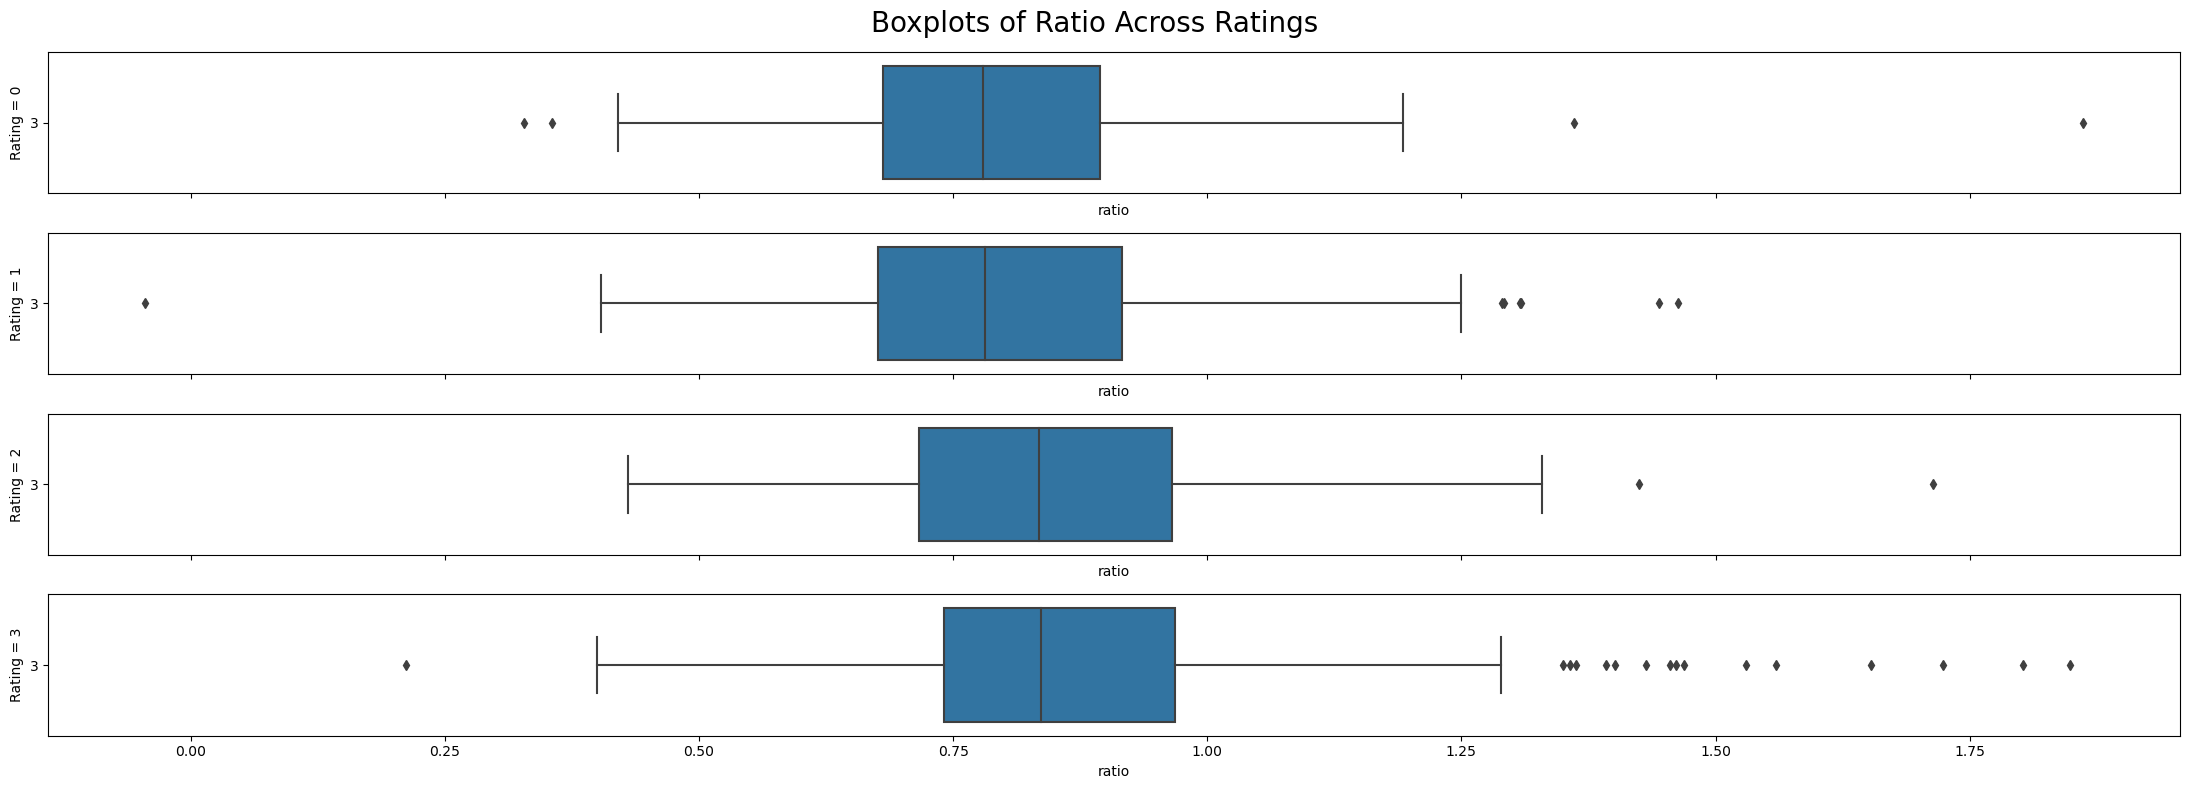

In [49]:
ratio = [r0, r1, r2, r3]

# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(22, 8), sharex=True, sharey=True)

# Iterate over ratio data frame
for i, df in enumerate(ratio):
    sns.boxplot(x=df['ratio'], y=df['rating'], ax=axes[i], orient='h')
    axes[i].set_ylabel(f'Rating = {i}')  # Add individual y-axis labels
    
fig.suptitle('Boxplots of Ratio Across Ratings', fontsize=20)

plt.tight_layout()

plt.show()

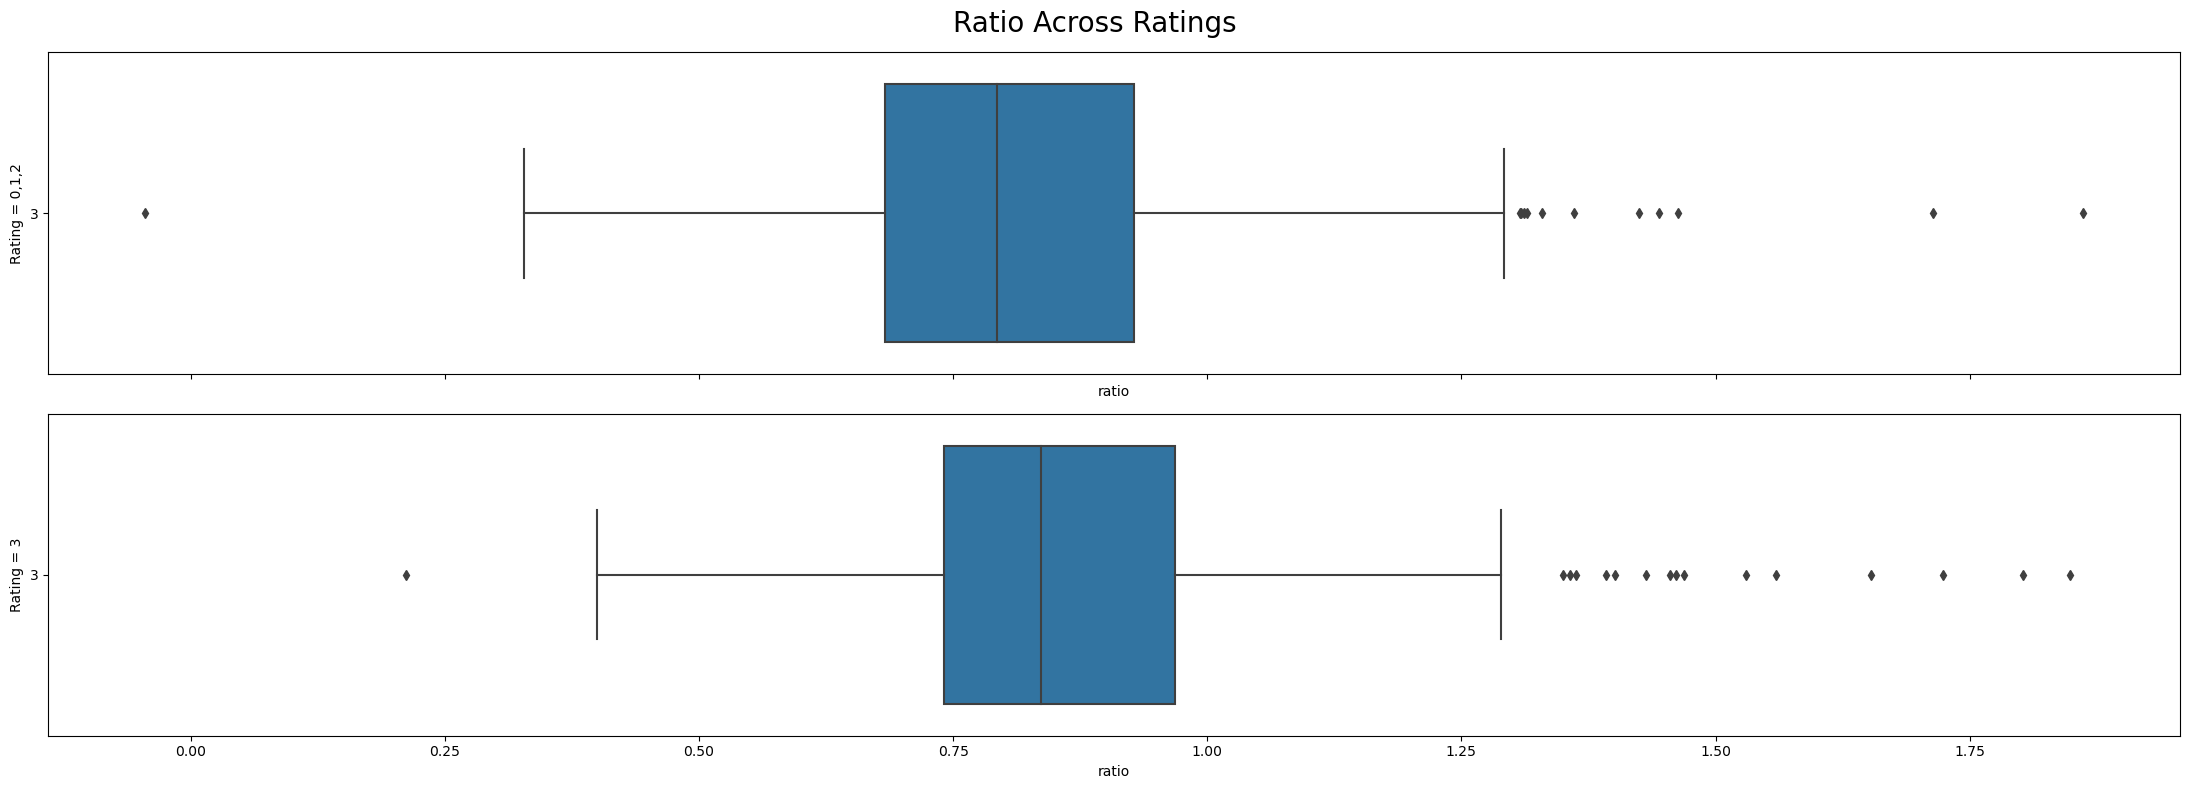

In [50]:
# Same boxplots as above, but one regrouping ratings 0, 1 and 2 as "not passing Bechdel test"

fig, axes = plt.subplots(2, 1, figsize=(22, 8), sharex=True, sharey=True)

sns.boxplot(x=r012['ratio'], ax=axes[0], orient='h')
axes[0].set_ylabel(f'Rating = 0,1,2')  

sns.boxplot(x=r3['ratio'], y=r3['rating'], ax=axes[1], orient='h')
axes[1].set_ylabel(f'Rating = 3')

fig.suptitle('Ratio Across Ratings', fontsize=20)

plt.tight_layout()

plt.show()

# Step 3.4 Presence of misogynistic tropes 

In [52]:
eaders_character = ["Wikipedia movie ID", "Freebase movie ID", "Movie release date", "Character name", "Actor date of birth", "Actor gender", "Actor height (in meters)", "Actor ethnicity (Freebase ID)", "Actor name", "Actor age at movie release", "Freebase character/actor map ID", "Freebase character ID", "Freebase actor ID"]

dfm = pd.read_csv('merged_df.csv', sep=',', header=0)
df_characters = pd.read_csv(data_folder + 'MovieSummaries/character.metadata.tsv',sep='\t', header=None, names=headers_character)

In [54]:
import json
file_path_tropes = "tvtropes.clusters.txt"

# Read the text file line by line
with open(file_path_tropes, 'r') as file:
    lines = file.readlines()

# Initialize empty lists to store data
tropes = []
data = []

# Parse each line and extract information
for line in lines:
    parts = line.split('\t')
    tropes.append(parts[0])  # Extract movie title
    data.append(json.loads(parts[1]))  # Parse JSON-like structure

# Create a DataFrame
df = pd.DataFrame(data)

# Add the movie title as a new column
df['character trope'] = tropes

# Display the DataFrame
df.head()

,char,movie,id,actor,character trope
0,Professor Philip Brainard,Flubber,/m/0jy9q0,Robin Williams,absent_minded_professor
1,Professor Keenbean,Richie Rich,/m/02vchl3,Michael McShane,absent_minded_professor
2,Dr. Reinhardt Lane,The Shadow,/m/0k6fkc,Ian McKellen,absent_minded_professor
3,Dr. Harold Medford,Them!,/m/0k6_br,Edmund Gwenn,absent_minded_professor
4,Daniel Jackson,Stargate,/m/0k3rhh,James Spader,absent_minded_professor


In [57]:
list_of_tropes = df['character trope'].drop_duplicates().tolist()
print("List of Tropes:", list_of_tropes)

List of Tropes: ['absent_minded_professor', 'adventurer_archaeologist', 'arrogant_kungfu_guy', 'big_man_on_campus', 'bounty_hunter', 'brainless_beauty', 'broken_bird', 'bromantic_foil', 'bruiser_with_a_soft_center', 'bully', 'byronic_hero', 'casanova', 'chanteuse', 'charmer', 'child_prodigy', 'classy_cat_burglar', 'consummate_professional', 'corrupt_corporate_executive', 'coward', 'crazy_jealous_guy', 'crazy_survivalist', 'cultured_badass', 'dean_bitterman', 'dirty_cop', 'ditz', 'doormat', 'drill_sargeant_nasty', 'dumb_blonde', 'dumb_muscle', 'eccentric_mentor', 'egomaniac_hunter', 'evil_prince', 'fastest_gun_in_the_west', 'father_to_his_men', 'final_girl', 'gadgeteer_genius', 'gentleman_thief', 'granola_person', 'grumpy_old_man', 'hardboiled_detective', 'heartbroken_badass', 'henpecked_husband', 'hitman_with_a_heart', 'jerk_jock', 'junkie_prophet', 'klutz', 'loser_protagonist', 'loveable_rogue', 'master_swordsman', 'morally_bankrupt_banker', 'officer_and_a_gentleman', 'ophelia', 'play

In [62]:
#Select tropes in list above that can be considered to be sexist
sexist_tropes_list = ['brainless_beauty', 'casanova', 'dumb_blonde', 'final_girl', 'ophelia', 'prima_donna', 'valley_girl']
#select characters from tropes dataset whose tropes are in the list above
sexist_tropes = df[df['character trope'].isin(sexist_tropes_list)]

In [63]:
sexist_tropes.head(3)

,char,movie,id,actor,character trope
35,Gemma Honeycutt,Fool's Gold,/m/04dddz5,Alexis Dziena,brainless_beauty
36,Matt Mateo,The Opposite of Sex,/m/02tbdw7,Ivan Sergei,brainless_beauty
37,Paul Metzler,Election,/m/02vdf9d,Chris Klein,brainless_beauty


In [64]:
# Exctract the column of interest and the important ID to merge later
tropes = sexist_tropes[['id','character trope']]

# Merge character tropes to dataframe of actors
dfc_tropes = pd.merge(dfc, tropes, left_on='Freebase character/actor map ID', right_on='id', how='inner')

# Make new dataframe with movies containing characters classified as sexist tropes
dfm_tropes = dfm[dfm['Wikipedia movie ID'].isin(dfc_tropes['Wikipedia movie ID'])]

# Count the numbers of characters per movie who are classified as sexist tropes
character_counts = dfc.groupby('Wikipedia movie ID')['Freebase character/actor map ID'].count().reset_index()
character_counts.columns = ['Wikipedia movie ID', 'CharacterCount']

# Add a column to the movie datframe containing the number of characters classified as sexist tropes
dfm = pd.merge(dfm, character_counts, on='Wikipedia movie ID', how='left')

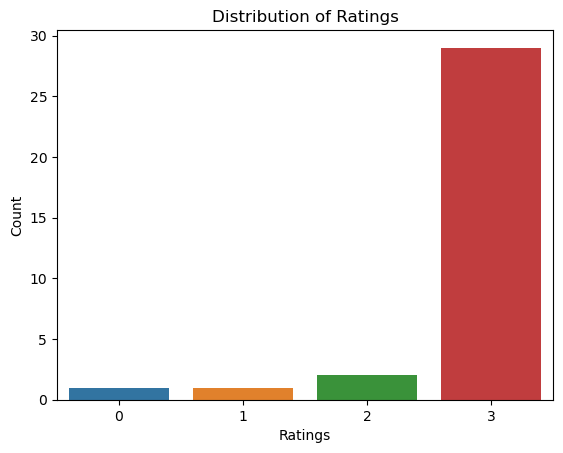

In [65]:
sns.countplot(x='rating', data=dfm_tropes)

# Set labels and title
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Distribution of Ratings')

# Show the plot
plt.show()

The graph above shows a high number of movies containing tropes and passing the Bechdel test. Since there are more movies passing the test in  the Bechdel  dataset, further analysis should be conducted to figure out whether tropes have an impact on whether a movie passes the Bechdel test or not. As a reminder, the assumption here is that passing the Bechdel test and containing many characters with tropes is not coherent.